In [1]:
import PIL

In [2]:
print('Pillow Version:',PIL.__version__)

Pillow Version: 6.2.0


In [3]:
from PIL import Image

In [4]:
import os
import glob
deer = []
path = "E:/AYYAPPA/ML/deer/"
rePath = "E:/AYYAPPA/ML/redeer/"
for file in os.listdir(path):
    image  = Image.open(path+file)
    image = image.convert('L')
    img_resized = image.resize((128,128))
     #l = file.split(".")
    deer.append(rePath+file)
    img_resized.save(rePath+file,"JPEG")
        

In [5]:
deer[:8]

['E:/AYYAPPA/ML/redeer/redeer0.jpg',
 'E:/AYYAPPA/ML/redeer/redeer1.jpg',
 'E:/AYYAPPA/ML/redeer/redeer10.jpg',
 'E:/AYYAPPA/ML/redeer/redeer100.jpg',
 'E:/AYYAPPA/ML/redeer/redeer101.jpg',
 'E:/AYYAPPA/ML/redeer/redeer102.jpg',
 'E:/AYYAPPA/ML/redeer/redeer103.jpg',
 'E:/AYYAPPA/ML/redeer/redeer104.jpg']

In [6]:
path = "E:/AYYAPPA/ML/lion/"
rePath = "E:/AYYAPPA/ML/relion/"
lion = []
for file in os.listdir(path):
    image = Image.open(path+file)
    image  = image.convert('L')
    img_resized = image.resize((128,128))
    lion.append(rePath+file)
    img_resized.save(rePath+file,"JPEG")

In [7]:
lion[:6]

['E:/AYYAPPA/ML/relion/relion0.jpg',
 'E:/AYYAPPA/ML/relion/relion1.jpg',
 'E:/AYYAPPA/ML/relion/relion10.jpg',
 'E:/AYYAPPA/ML/relion/relion100.jpg',
 'E:/AYYAPPA/ML/relion/relion101.jpg',
 'E:/AYYAPPA/ML/relion/relion102.jpg']

In [8]:
data = lion+deer

In [9]:
import random
random.shuffle(data)

In [10]:
data[8]

'E:/AYYAPPA/ML/relion/relion87.jpg'

In [11]:
len(data)

692

In [12]:
train = data[:484]

In [13]:
test = data[484:]

In [14]:
def splitXandY(f):
    x = []
    y = []
    for i in f:
        x.append(i)
        if "lion" in i:
            y.append(1)
        elif "deer" in i:
            y.append(0)
    return x,y

In [15]:
x_test,y_test = splitXandY(test)

In [16]:
x_test[:10]

['E:/AYYAPPA/ML/redeer/redeer229.jpg',
 'E:/AYYAPPA/ML/relion/relion47.jpg',
 'E:/AYYAPPA/ML/redeer/redeer143.jpg',
 'E:/AYYAPPA/ML/redeer/redeer223.jpg',
 'E:/AYYAPPA/ML/redeer/redeer59.jpg',
 'E:/AYYAPPA/ML/relion/relion133.jpg',
 'E:/AYYAPPA/ML/relion/relion77.jpg',
 'E:/AYYAPPA/ML/relion/relion160.jpg',
 'E:/AYYAPPA/ML/redeer/redeer213.jpg',
 'E:/AYYAPPA/ML/redeer/redeer188.jpg']

In [17]:
y_test[:10]

[0, 1, 0, 0, 0, 1, 1, 1, 0, 0]

In [18]:
x_train,y_train = splitXandY(train)

In [19]:
print(x_train[:6])
y_train[:6]

['E:/AYYAPPA/ML/relion/relion99.jpg', 'E:/AYYAPPA/ML/redeer/redeer150.jpg', 'E:/AYYAPPA/ML/redeer/redeer93.jpg', 'E:/AYYAPPA/ML/redeer/redeer109.jpg', 'E:/AYYAPPA/ML/redeer/redeer301.jpg', 'E:/AYYAPPA/ML/relion/relion175.jpg']


[1, 0, 0, 0, 0, 1]

In [20]:
import numpy as np
def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img,dtype  = "int32")
    return data/255.0

In [21]:
x_train = [load_image(i) for i in x_train]

In [22]:
x_train[0]

array([[0.16470588, 0.16470588, 0.16470588, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.16470588, 0.16470588, 0.16470588, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.16470588, 0.16470588, 0.16470588, ..., 0.06666667, 0.06666667,
        0.06666667],
       ...,
       [0.51372549, 0.51372549, 0.50980392, ..., 0.07843137, 0.30980392,
        0.        ],
       [0.51372549, 0.51372549, 0.50980392, ..., 0.02745098, 0.32941176,
        0.00784314],
       [0.51372549, 0.51372549, 0.50980392, ..., 0.03137255, 0.3372549 ,
        0.        ]])

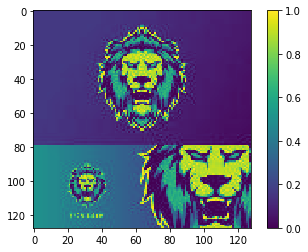

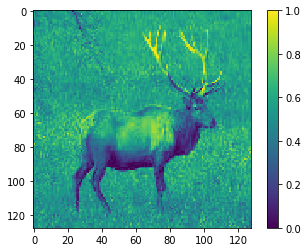

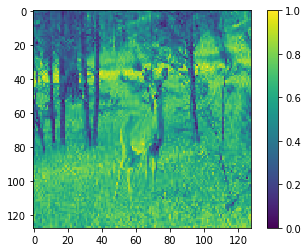

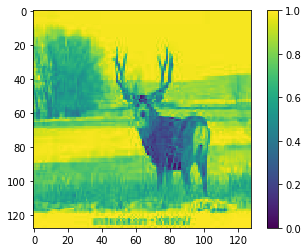

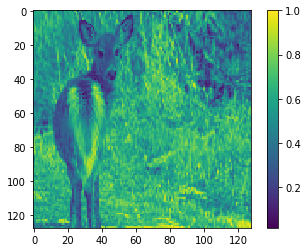

In [23]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
for i in x_train[:5]:
    plt.figure()
    plt.imshow(i)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [24]:
x_test = [load_image(i) for i in x_test]

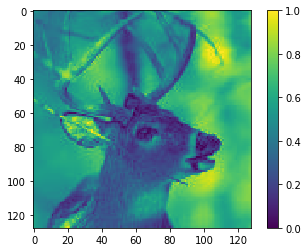

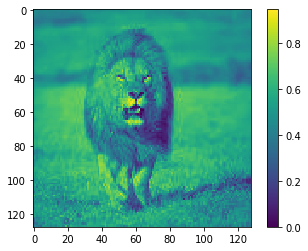

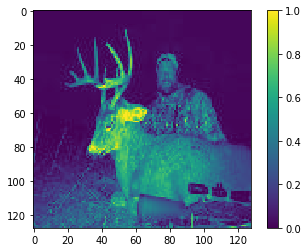

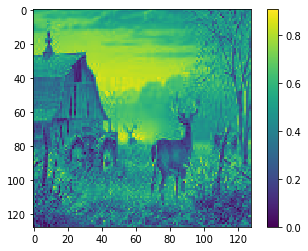

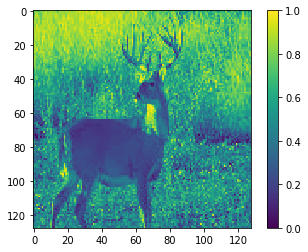

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
for i in x_test[:5]:
    plt.figure()
    plt.imshow(i)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [26]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:

import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128)),
    keras.layers.Dense(254,activation= 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

Using TensorFlow backend.


In [29]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [30]:
x = np.array(x_train)

In [31]:
model.fit(x,y_train,epochs = 5)

Epoch 1/5
484/484 [==============================] - 3s 6ms/step - loss: 5.9568 - accuracy: 0.5062
Epoch 2/5
484/484 [==============================] - 2s 3ms/step - loss: 1.3680 - accuracy: 0.5950
Epoch 3/5
484/484 [==============================] - 2s 3ms/step - loss: 0.7811 - accuracy: 0.6302
Epoch 4/5
484/484 [==============================] - 2s 4ms/step - loss: 0.6266 - accuracy: 0.6550
Epoch 5/5
484/484 [==============================] - 2s 3ms/step - loss: 0.6996 - accuracy: 0.6426


In [34]:
x_test = np.array(x_test)
test_loss,test_acc = model.evaluate(x_test,y_test, verbose = 2)
print('\ntest accuracy:',test_acc)
print('\nTest loss:',test_loss)


test accuracy: 0.5913461446762085

Test loss: 0.8906426429748535


In [35]:
predictions = model.predict(x_test)

In [36]:
predictions[0]

array([0.8217502], dtype=float32)

In [40]:
if predictions[12] > 0.5:
    print("lion")
else :
    print("deer")

lion


In [41]:
if y_test[12]>0.5:
    print("lion")
else:
    print("deer")

lion
